# FashionMNIST

In [1]:
from nimrod.utils import set_seed
from nimrod.models.core import lr_finder, train_one_cycle
import torch.nn as nn

from hydra.utils import instantiate
from omegaconf import OmegaConf
from rich import print

%load_ext autoreload
%autoreload 2
set_seed()


[13:06:02] INFO - PyTorch version 2.3.0 available.
Seed set to 42
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
Seed set to 42


## Data

Seed set to 42
[14:56:47] INFO - Init ImageDataModule for fashion_mnist
[14:56:50] INFO - loading dataset fashion_mnist with args () from split train
[14:56:50] INFO - loading dataset fashion_mnist from split train
Overwrite dataset info from restored data version if exists.
[14:56:52] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/fashion_mnist/fashion_mnist/0.0.0/531be5e2ccc9dba0c201ad3ae567a4f3d16ecdd2
[14:56:52] INFO - Loading Dataset info from ../data/image/fashion_mnist/fashion_mnist/0.0.0/531be5e2ccc9dba0c201ad3ae567a4f3d16ecdd2
Found cached dataset fashion_mnist (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/fashion_mnist/fashion_mnist/0.0.0/531be5e2ccc9dba0c201ad3ae567a4f3d16ecdd2)
[14:56:52] INFO - Found cached dataset fashion_mnist (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/fashion_mnist/fashion_mnist/0.0.0/531be5e2ccc9dba0c201ad3ae567a4f3d16ecdd2)
Loading Dataset info from /user/s/slegrou

_target_: nimrod.image.datasets.ImageDataModule
name: fashion_mnist
data_dir: ../data/image
train_val_split:
- 0.8
- 0.2
batch_size: 512
num_workers: 0
pin_memory: false
persistent_workers: false
transforms:
  _target_: torchvision.transforms.Compose
  transforms:
  - _target_: torchvision.transforms.ToTensor
  - _target_: torchvision.transforms.Normalize
    mean: 0.28
    std: 0.35
  - _target_: torchvision.transforms.Resize
    size: 32

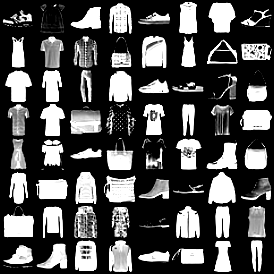

In [10]:
cfg = OmegaConf.load('../config/data/image/fashion_mnist.yaml')
cfg.data_dir = "../data/image"
cfg.batch_size = 512
cfg.num_workers = 0
dm = instantiate(cfg)
dm.prepare_data()
dm.setup()
print(OmegaConf.to_yaml(cfg))
xb, yb = next(iter(dm.train_dataloader()))
dm.show_batch(xb[:64])

## MLP

1024

[17:18:58] INFO - MLP: init
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[17:18:58] INFO - MLP_X init
[17:18:58] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[17:19:01] INFO - loading dataset fashion_mnist with args () from split train
[17:19:08] INFO - loading dataset fashion_mnist with args () from split test
[17:19:11] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[17:19:11] WARNING - no scheduler has been setup
/Users/slegroux/minifor

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 90 steps due to diverging loss.
Learning rate set to 0.001778279410038923
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_a0d8030e-f0ea-4aae-b869-6c4bf8fe730e.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_a0d8030e-f0ea-4aae-b869-6c4bf8fe730e.ckpt


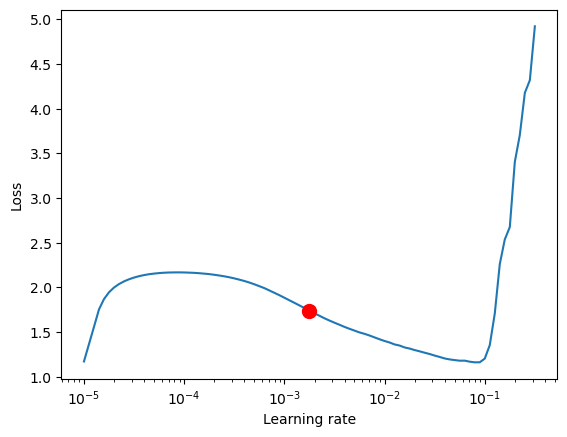

Suggested learning rate: 0.001778279410038923

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[17:19:16] INFO - MLP_X init
[17:19:16] INFO - Classifier: init
wandb: Currently logged in as: slegroux. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


[17:19:19] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[17:19:19] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | MLP                | 264 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
264 K     Trainable params
0         Non-trainable params
264 K     Total params
1.060     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │     0.861299991607666     │
│         test/loss         │    0.3925398588180542     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆███████████
lr-AdamW,▁▂▂▃▃▆▇▇████████▇▇▇▇▇▇▆▆▆▄▄▄▃▃▃▂▁▁▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▇▇██
train/acc_step,▁▂▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████▇████████▇████
train/loss_epoch,█▂▁▁▁
train/loss_step,██▆▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇██
val/acc,▁▅▇██
val/acc_best,▁▅▇██


In [3]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/mlpx.yaml')
cfg_model.nnet.n_in = dm.dim[0] * dm.dim[1]
print(cfg_model.nnet.n_in)
cfg_model.nnet.n_h = 256
cfg_model.nnet.dropout = 0.1
model = instantiate(cfg_model) #partial

tags = [f"n_h:{cfg_model.nnet.n_h}", f"dropout:{cfg_model.nnet.dropout}",f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name='FASHION-MNIST-Classifier',
    tags=tags,
    model_summary=False,
    logger=exp_logger
    )

## ConvNet

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[20:19:45] INFO - ConvNetX: init
[20:19:45] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[20:19:49] INFO - loading dataset fashion_mnist with args () from split train
[20:19:56] INFO - loading dataset fashion_mnist with args () from split test
[20:19:59] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[20:19:59] WARNING - no scheduler has been setup
/Users/slegroux/miniforge3/envs/nimrod/lib/pyth

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001122018454301963
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_89ade283-e064-488b-a73d-0abdb2fdb66d.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_89ade283-e064-488b-a73d-0abdb2fdb66d.ckpt


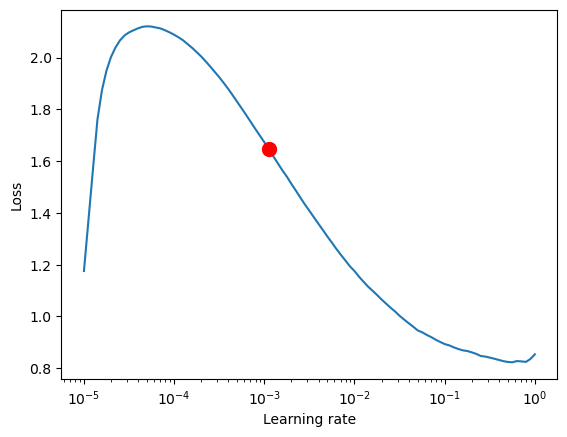

Suggested learning rate: 0.001122018454301963

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[20:20:04] INFO - ConvNetX: init
[20:20:04] INFO - Classifier: init


==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
==========================================================================================
Total params: 177,018
Trainable params: 177,018
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 2.04
==========================================================================================
Input size (MB): 2.10
Forward/backward pass size (MB): 253.80
Params size (MB): 0.71
Estimated Total Size (MB): 256.60
==========================================================================================

[20:20:36] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[20:20:36] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ConvNet            | 177 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
177 K     Trainable params
0         Non-trainable params
177 K     Total params
0.708     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9197999835014343     │
│         test/loss         │    0.2374846637248993     │
└───────────────────────────┴───────────────────────────┘

wandb: ERROR Control-C detected -- Run data was not synced


KeyboardInterrupt: 

In [4]:
# SETUP

N_EPOCHS = 10
do_lr_finder = True
project_name = 'FASHION-MNIST-Classifier'
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 8, 16, 32, 64, 128]
feats_dim = [1, 16, 32, 64, 128, 64]
cfg_model.nnet.n_features = feats_dim
# cfg_model.nnet.normalization = None
# cfg_model.nnet.bias = True
model = instantiate(cfg_model) #partial

tags = [
    f"n_features:{feats_dim}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}",
    ]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger=exp_logger
    )

## ResNet

[15:17:31] INFO - ResNet: init
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:17:31] INFO - ResNetX: init
[15:17:31] INFO - Classifier: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[15:17:33] INFO - loading dataset fashion_mnist with args () from split train
[15:17:33] INFO - loading dataset fashion_mnist from split train
Overwrite dataset info from restored data version if exists.
[15:17:35] INFO - Overwrite dataset info from restored data version if exists

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 67 steps due to diverging loss.
Learning rate set to 0.004466835921509632
Restoring states from the checkpoint path at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_9d236a21-9f1a-4d48-a667-7888b8cd5884.ckpt
Restored all states from the checkpoint at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_9d236a21-9f1a-4d48-a667-7888b8cd5884.ckpt


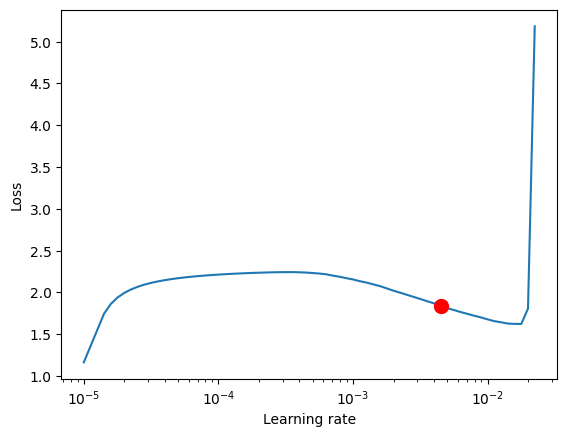

Suggested learning rate: 0.004466835921509632

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:17:44] INFO - ResNetX: init
[15:17:44] INFO - Classifier: init


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 10]                 --
├─Sequential: 1-1                                  [512, 10]                 --
│    └─ResBlock: 2-1                               [512, 16, 32, 32]         --
│    │    └─Sequential: 3-1                        [512, 16, 32, 32]         2,448
│    │    └─Identity: 3-2                          [512, 1, 32, 32]          --
│    │    └─ConvLayer: 3-3                         [512, 16, 32, 32]         16
│    │    └─LeakyReLU: 3-4                         [512, 16, 32, 32]         --
│    └─ResBlock: 2-2                               [512, 32, 16, 16]         --
│    │    └─Sequential: 3-5                        [512, 32, 16, 16]         13,824
│    │    └─AvgPool2d: 3-6                         [512, 16, 16, 16]         --
│    │    └─ConvLayer: 3-7                         [512, 32, 16, 16]         512
│    │    └─LeakyReLU: 3-8                         [512, 32, 16, 16]         --
│    └─ResBlock: 2-3                               [512, 64, 8, 8]           --
│    │    └─Sequential: 3-9                        [512, 64, 8, 8]           55,296
│    │    └─AvgPool2d: 3-10                        [512, 32, 8, 8]           --
│    │    └─ConvLayer: 3-11                        [512, 64, 8, 8]           2,048
│    │    └─LeakyReLU: 3-12                        [512, 64, 8, 8]           --
│    └─ResBlock: 2-4                               [512, 128, 4, 4]          --
│    │    └─Sequential: 3-13                       [512, 128, 4, 4]          221,184
│    │    └─AvgPool2d: 3-14                        [512, 64, 4, 4]           --
│    │    └─ConvLayer: 3-15                        [512, 128, 4, 4]          8,192
│    │    └─LeakyReLU: 3-16                        [512, 128, 4, 4]          --
│    └─ResBlock: 2-5                               [512, 64, 2, 2]           --
│    │    └─Sequential: 3-17                       [512, 64, 2, 2]           110,592
│    │    └─AvgPool2d: 3-18                        [512, 128, 2, 2]          --
│    │    └─ConvLayer: 3-19                        [512, 64, 2, 2]           8,192
│    │    └─LeakyReLU: 3-20                        [512, 64, 2, 2]           --
│    └─ResBlock: 2-6                               [512, 10, 1, 1]           --
│    │    └─Sequential: 3-21                       [512, 10, 1, 1]           6,660
│    │    └─AvgPool2d: 3-22                        [512, 64, 1, 1]           --
│    │    └─ConvLayer: 3-23                        [512, 10, 1, 1]           640
│    │    └─LeakyReLU: 3-24                        [512, 10, 1, 1]           --
│    └─Flatten: 2-7                                [512, 10]                 --
====================================================================================================
Total params: 429,604
Trainable params: 429,604
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 13.07
====================================================================================================
Input size (MB): 2.10
Forward/backward pass size (MB): 560.19
Params size (MB): 1.72
Estimated Total Size (MB): 564.00
====================================================================================================

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/FASHION-MNIST-Classifier/ResNetX-bs:512-epochs:10 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[15:17:45] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[15:17:45] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 429 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9247000217437744     │
│         test/loss         │    0.2308308631181717     │
└───────────────────────────┴───────────────────────────┘

[15:18:47] INFO - Best ckpt path: /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/FASHION-MNIST-Classifier/ResNetX-bs:512-epochs:10/9-0.09.ckpt


epoch,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇██
lr-AdamW,▁▂▄▄▄▆▇██████████▇▇▇▆▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▅▆▇▇▇▇███
train/acc_step,▁▁▄▄▅▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████▇▇▇▇███████████
train/loss_epoch,█▃▃▂▂▂▂▁▁▁
train/loss_step,█▅▃▂▃▃▃▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇████
val/acc,▁▃▄▆▆▇▇███
val/acc_best,▁▃▄▆▆▇▇███


'/user/s/slegroux/Projects/nimrod/tutorials/checkpoints/FASHION-MNIST-Classifier/ResNetX-bs:512-epochs:10/9-0.09.ckpt'

In [17]:
# SETUP

N_EPOCHS = 10
do_lr_finder = True
project_name = 'FASHION-MNIST-Classifier'
# exp_logger = 'tensorboard'
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
feats_dim = [1, 16, 32, 64, 128, 64]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger
    )